# Notebooks to merge subject information from imaging, clinical assessments and other sources of data
## Groups: 'PD', 'Prodromal', 'SWEDD', 'Control', 'Phantom', 'GenReg Unaff'

In [16]:
# from pathlib import Path
import sys
proj_path_str='/scratch/mr_proc'
sys.path.append(proj_path_str)
from pathlib import Path
import nipype.interfaces.io as nio
import pandas as pd
import numpy as np
from private_libs.private_utils import report_visit

#PATH
main_dir = Path(proj_path_str)
data_dir = main_dir / 'tab_data' 
#out_dir = Path("/output")

#ppmi_dcm_file = data_dir / 'ppmi_dicomInfo.tsv'           # Inormation from dicom headers.
ppmi_img_dl_file = data_dir / 'PPMI_3T_sdMRI_3_07_2022.csv'  # Inormation from download database.
ppmi_moca_file  = data_dir / 'Montreal_Cognitive_Assessment__MoCA_.csv'  # Inormation from download database.
ppmi_updrs3_file  = data_dir / 'MDS_UPDRS_Part_III.csv'  # Inormation from download database.
ppmi_dicom_file = data_dir / 'PPMI_dicomInfo.tsv'  # Inormation from download database.

# Read tabular information
ppmi_img_dl_data  = pd.read_csv(ppmi_img_dl_file, sep=',')
ppmi_img_col_sel = ['Image Data ID', 'Subject', 'Group', 'Sex', 'Age', 'Visit', 'Modality', 'Description']
# select imaging columns
ppmi_img_dl_data = ppmi_img_dl_data.loc[:, ppmi_img_col_sel].copy()
# select study groups
group_sel_list=['PD', 'Prodromal', 'SWEDD', 'Control']
ppmi_img_dl_data = ppmi_img_dl_data[ppmi_img_dl_data.Group.isin(group_sel_list)].copy()
# Get subject list and group information from imaging data
subject_group = ppmi_img_dl_data.loc[:, ['Subject','Group']].copy();
subject_group.groupby('Subject').agg(lambda x: set(x));
subject_group['Subject']=[int(x) for x in subject_group['Subject']]
# Get T1 and DTI data
sequence_str=['T1', 'MPRAGE', 'DTI']
ppmi_img_dl_data = ppmi_img_dl_data[(ppmi_img_dl_data['Description'].str.contains(sequence_str[0]))|(ppmi_img_dl_data['Description'].str.contains(sequence_str[1]))|(ppmi_img_dl_data['Description'].str.contains(sequence_str[2]))].copy()
# Get additional sequence information
protocol_seqs=ppmi_img_dl_data.Description.unique()

# read and select UPDRS-3data
ppmi_updrs3_data = pd.read_csv(ppmi_updrs3_file, sep=',')
updrs3_list= ['PATNO', 'EVENT_ID', 'NP3SPCH', 'NP3FACXP','NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR',
             'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR',
             'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT',
             'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR',
             'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'NP3TOT', 'NHY'];
other_updrs_list = ['DYSKPRES', 'DYSKIRAT'];
ppmi_updrs3_data=ppmi_updrs3_data.loc[:,updrs3_list].copy();

# read and select MOCA data
ppmi_moca_data   = pd.read_csv(ppmi_moca_file, sep=',')
moca_list= ['PATNO', 'EVENT_ID', 'MCAALTTM', 'MCACUBE', 'MCACLCKC', 'MCACLCKN', 'MCACLCKH', 'MCALION', 'MCARHINO',
            'MCACAMEL', 'MCAFDS', 'MCABDS', 'MCAVIGIL', 'MCASER7', 'MCASNTNC',
            'MCAVFNUM', 'MCAVF', 'MCAABSTR', 'MCAREC1', 'MCAREC2', 'MCAREC3',
            'MCAREC4', 'MCAREC5', 'MCADATE', 'MCAMONTH', 'MCAYR', 'MCADAY', 'MCAPLACE', 'MCACITY', 'MCATOT'];
ppmi_moca_data=ppmi_moca_data.loc[:,moca_list].copy();

## reading dicom header collection data
ppmi_dicom_data = pd.read_csv(ppmi_dicom_file, sep='\t')
dicom_list = ['patient_id', 'patient_age', 'patient_sex', 'dim1', 'dim2', 'dim3', 'dim4', 'TR', 'TE', 'series_description', 'dcm_dir_name'];
ppmi_dicom_data=ppmi_dicom_data.loc[:,dicom_list].copy()

/usr/local/miniconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (10,17,18,19,20,21,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
ppmi_dicom_data[ppmi_dicom_data['series_description']=='2D GRE - MT']

,patient_id,patient_age,patient_sex,dim1,dim2,dim3,dim4,TR,TE,series_description,dcm_dir_name
2584,101344,000Y,NaN,512,512,10,1,0.45,4.4,2D GRE - MT,I1496470
2593,101344,000Y,NaN,512,512,10,1,0.45,4.4,2D GRE - MT,I1496469
2594,101344,000Y,NaN,512,512,10,1,0.45,4.4,2D GRE - MT,I1496468
2595,101344,000Y,NaN,512,512,10,1,0.45,4.4,2D GRE - MT,I1496472
2598,101344,000Y,NaN,512,512,10,1,0.45,4.4,2D GRE - MT,I1496471


## PPMI Converion: from dicom to BIDS niftis with HeuDiConv_0.9.0 

***Due to the limitation of number of inodes on CC, PPMI data is splited into PPMI_1.zip on Beluga and PPMI_2.zip on Narval, the data will be merged after conversion.***

    1. Extract all the dicoms in a folder named PPMI: '''unzip PPMI.zip -d ~/scratch/'''
    2. Correct studyID problems (takes hours to finish, put into subject paralellization next time): '''python studyID_fixer.py --data PPMI'''
    3. '''heudiconv_run1.sh PPMI''' + '''heudiconv_run1.format PPMI'''
    4. '''heudiconv_run2.sh PPMI all''' + '''heudiconv_run2.format PPMI'''
    5. Merge PPMI from Beluga nad Narval.

In [18]:
# return the dicom rows with na
print("dicom info: ", dicom_list)
print("total number of subjects: ")
display(ppmi_dicom_data.patient_id.unique().size)
print("subjects without series_description: ")
display(ppmi_dicom_data[ppmi_dicom_data['series_description'].isnull()].patient_id.unique().size)
print("subjects without sex: ")
display(ppmi_dicom_data[ppmi_dicom_data['patient_sex'].isnull()].patient_id.unique().size)
print("subjects without age: ")
display(ppmi_dicom_data[ppmi_dicom_data['patient_age'].isnull()].patient_id.unique().size)
print("subjects with any NA values : ")
display(ppmi_dicom_data[ppmi_dicom_data.isna().any(axis=1)].patient_id.unique().size)

dicom info:  ['patient_id', 'patient_age', 'patient_sex', 'dim1', 'dim2', 'dim3', 'dim4', 'TR', 'TE', 'series_description', 'dcm_dir_name']
total number of subjects: 


569

subjects without series_description: 


1

subjects without sex: 


20

subjects without age: 


14

subjects with any NA values : 


21

## Merging Ross's PPMI protocol and split modalities
https://github.com/rmarkello/pypmi

    1. All the protocols in Ross list and current dicom list are all included;
    2. Naming the dwi derivatives according to the most recent but unpublished dwi BIDS standard: (https://github.com/bids-standard/bids-bep016/blob/bep-016/src/05-derivatives/05-diffusion-derivatives.md)
    3. 
    

In [19]:
# Ross series_description included
T1W_SERIES      = ['MPRAGE 2 ADNI', 'MPRAGE ADNI', 'MPRAGE GRAPPA 2', 'MPRAGE GRAPPA2', 'MPRAGE GRAPPA2(adni)', 'MPRAGE w/ GRAPPA', 'MPRAGE_GRAPPA', 'MPRAGE_GRAPPA_ADNI', 'MPRAGE GRAPPA', 'SAG T1 3D MPRAGE', 'sag mprage', 'MPRAGEadni', 'MPRAGE GRAPPA_ND', '3D SAG', 'MPRAGE T1 SAG', 'MPRAGE SAG', 'SAG T1 3DMPRAGE', 'SAG T1 MPRAGE', 'SAG 3D T1', 'SAG MPRAGE GRAPPA2-NEW2016', 'SAG MPRAGE GRAPPA_ND', 'Sag MPRAGE GRAPPA', 'AXIAL T1 3D MPRAGE', 'SAG MPRAGE GRAPPA', 'sT1W_3D_FFE', 'sT1W_3D_ISO', 'sT1W_3D_TFE', 'sag 3D FSPGR BRAVO straight', 'SAG T1 3D FSPGR', 'SAG FSPGR 3D SAG 3D FSPGR BRAVO STRAIGHT', 'SAG T1 3D FSPGR 3RD REPEAT', 'SAG FSPGR BRAVO', 'SAG SPGR 3D', 'SAG 3D SPGR', 'FSPGR 3D SAG', 'SAG FSPGR 3D', 'SAG 3D FSPGR BRAVO STRAIGHT', 'SAG FSPGR 3D ', 't1_mpr_ns_sag_p2_iso', 'T1', 'T1 Repeat', 'AX T1', 'axial spgr', 'T1W_3D_FFE AX', 'AX T1 SE C+']
T2W_SERIES      = ['t2_tse_tra', 't2 cor', 'T2 COR', 'T2W_TSE', 'AX T2', 'AX T2 AC-PC LINE ENTIRE BRAIN', 'AX T2 AC-PC line Entire Brain', 'Ax T2 Fse thin ac-pc', 'AXIAL FSE T2 FS']
PD_SERIES       = ['Ax T2* GRE']
PDT2_SERIES     = ['AX DE TSE', 'AX DUAL_TSE', 'DUAL_TSE', 'sT2W/PD_TSE', 'Axial PD-T2-FS TSE', 'Axial PD-T2 TSE', 'Axial PD-T2 TSE FS', 'AXIAL PD-T2 TSE FS', 'AX PD + T2', 'PD-T2 DUAL AXIAL TSE', 'Axial PD-T2 TSE_AC/PC line', 'Axial PD-T2 TSE_AC PC line', 'Ax PD /T2', 'AXIAL PD+T2 TSE', 'AX T2 DE', 't2 weighted double echo', 'T2']
FLAIR_SERIES    = ['FLAIR_LongTR AX', 'FLAIR_LongTR SENSE', 'AX FLAIR', 'AXIAL FLAIR', 'FLAIR_longTR', 'FLAIR AXIAL', 'ax flair', 'Cor FLAIR TI_2800ms', 'FLAIR', 'AX T2 FLAIR', 'T2  AXIAL FLAIR', 'Ax T2 FLAIR  ang to ac-pc', 'T2W_FLAIR', 'AX FLAIR T2', 'AX T2 FLAIR 5/1', 'Ax T2 FLAIR', 't2_tirm_tra_dark-fluid_', 't2_tirm_tra_dark-fluid NO BLADE', 'Ax T1 FLAIR', 'AX T1 FLAIR']
BOLD_SERIES     = ['ep2d_RESTING_STATE', 'ep2d_bold_rest']
DTI_SERIES      = ['DTI_gated', 'DTI_non_gated', 'DTI_pulse gated_AC/PC line', 'REPEAT_DTI_GATED', 'DTI_NONGATED', 'REPEAT_DTI_NONGATED', 'TRIGGERED DTI', 'DTI_NON gated', 'DTI_ non_gated', 'DTI_non gated Repeat', 'DTI_NON-GATED', 'REPEAT_DTI_NON-GATED', 'DTI_none_gated', 'DTI_non gated', 'Repeat DTI_non gated', 'REPEAT_NON_GATED', 'DTI', 'REPEAT_DTI_ NON GATED', 'REPEAT_DTI_NON GATED', 'DTI_NON GATED', 'DTI Sequence', 'DTI_ NON gated REPEAT', 'DTI_ non gated', 'DTI_GATED', 'DTI_NON gated REPEAT', 'DTI_NON_GATED', 'DTI_Non Gated', 'DTI_Non gated', 'DTI_Non gated Repeat', 'DTI_Non-gated', 'DTI_UNgated', 'DTI_UNgated#2', 'DTI_gated AC-PC LINE', 'DTI_gated#1', 'DTI_gated#2', 'DTI_gated_ADC', 'DTI_gated_FA', 'DTI_gated_TRACEW', 'DTI_non gated repeat', 'DTI_pulse gated_AC PC line', 'DTI_ungated', 'REPEAT DTI_NON GATED', 'REPEAT DTI_NON gated', 'REPEAT_NON DTI_GATED', 'Repeat DTI Sequence']
T2W_PDT2_SERIES = ['Ax T2 FSE', '*AX FSE T2', 'AX T2 FSE', '*Ax T2 FSE', 'AXIAL  T2  FSE']

# Vincent series_description included
T1W_SERIES_vin = ['MPRAGE 2 ADNI', 'MPRAGE ADNI', 'MPRAGE GRAPPA 2', 'MPRAGE GRAPPA2', 'MPRAGE GRAPPA2(adni)', 'MPRAGE w/ GRAPPA', 'MPRAGE_GRAPPA', 'MPRAGE_GRAPPA_ADNI', 'MPRAGE GRAPPA', 'SAG T1 3D MPRAGE', 'sag mprage', 'MPRAGEadni', 'MPRAGE GRAPPA_ND', '3D SAG', 'MPRAGE T1 SAG', 'MPRAGE SAG', 'SAG T1 3DMPRAGE', 'SAG T1 MPRAGE', 'SAG 3D T1', 'SAG MPRAGE GRAPPA2-NEW2016', 'SAG MPRAGE GRAPPA_ND', 'Sag MPRAGE GRAPPA', 'AXIAL T1 3D MPRAGE', 'SAG MPRAGE GRAPPA', 'sT1W_3D_FFE', 'sT1W_3D_ISO', 'sT1W_3D_TFE', 'sag 3D FSPGR BRAVO straight', 'SAG T1 3D FSPGR', 'SAG FSPGR 3D SAG 3D FSPGR BRAVO STRAIGHT', 'SAG T1 3D FSPGR 3RD REPEAT', 'SAG FSPGR BRAVO', 'SAG SPGR 3D', 'SAG 3D SPGR', 'FSPGR 3D SAG', 'SAG FSPGR 3D', 'SAG 3D FSPGR BRAVO STRAIGHT', 'SAG FSPGR 3D ', 't1_mpr_ns_sag_p2_iso', 'T1', 'T1 Repeat', 'AX T1', 'axial spgr', 'T1W_3D_FFE AX', 'AX T1 SE C+', '3D SAG T1 MPRAGE', '3D SAG T1 MPRAGE_ND', '3D T1', '3D T1 MPRAGE', '3D T1-weighted', 'Accelerated Sag IR-FSPGR', 'MPRAGE', 'MPRAGE - Sag', 'MPRAGE Phantom GRAPPA2', 'MPRAGE w/ GRAPPA 2', 'PPMI_MPRAGE_GRAPPA2', 'SAG 3D T1 FSPGR', 'SAG FSPGR 3D VOLUMETRIC T1', 'Sag MPRAGE GRAPPA_ND', 'T1-weighted, 3D VOLUMETRIC', 'tra_T1_MPRAGE']
T2W_SERIES_vin = ['t2_tse_tra', 't2 cor', 'T2 COR', 'T2W_TSE', 'AX T2', 'AX T2 AC-PC LINE ENTIRE BRAIN', 'AX T2 AC-PC line Entire Brain', 'Ax T2 Fse thin ac-pc', 'AXIAL FSE T2 FS', '2D GRE - MT', '2D GRE MT', '2D GRE-MT', '2D GRE-MT_RPT2', '2D GRE-NM', '2D GRE-NM_MT', '2D_GRE-MT', 'AX GRE -MT', 'AXIAL 2D GRE-MT', 'LOWER 2D GRE MT']
T2_STAR_SERIES_vin = ['AXIAL_T2_STAR']
PD_SERIES_vin = ['Ax T2* GRE']
T2W_PDT2_SERIES_vin = ['Ax T2 FSE', '*AX FSE T2', 'AX T2 FSE', '*Ax T2 FSE', 'AXIAL  T2  FSE']
PDT2_SERIES_vin = ['AX DE TSE', 'AX DUAL_TSE', 'DUAL_TSE', 'sT2W/PD_TSE', 'Axial PD-T2-FS TSE', 'Axial PD-T2 TSE', 'Axial PD-T2 TSE FS', 'AXIAL PD-T2 TSE FS', 'AX PD + T2', 'PD-T2 DUAL AXIAL TSE', 'Axial PD-T2 TSE_AC/PC line', 'Axial PD-T2 TSE_AC PC line', 'Ax PD /T2', 'AXIAL PD+T2 TSE', 'AX T2 DE', 't2 weighted double echo', 'T2']
FLAIR_SERIES_vin = ['FLAIR_LongTR AX', 'FLAIR_LongTR SENSE', 'AX FLAIR', 'AXIAL FLAIR', 'FLAIR_longTR', 'FLAIR AXIAL', 'ax flair', 'Cor FLAIR TI_2800ms', 'FLAIR', 'AX T2 FLAIR', 'T2  AXIAL FLAIR', 'Ax T2 FLAIR  ang to ac-pc', 'T2W_FLAIR', 'AX FLAIR T2', 'AX T2 FLAIR 5/1', 'Ax T2 FLAIR', 't2_tirm_tra_dark-fluid_', 't2_tirm_tra_dark-fluid NO BLADE', 'Ax T1 FLAIR', 'AX T1 FLAIR', '3D T2  SPC FLAIR C9C1HN007', '3D T2 FLAIR', '3D T2 FLAIR_ND', '3D T2 FLAIR_SAGITAL', '3D T2 FLAIR_ti1650', '3D T2 FLAIR_ti1650_ND', '3D_Brain_VIEW_FLAIR_SAG', '3D_T2_FLAIR', '3D_T2_FLAIR_SAG INVICCRO T2 FLAIR', 'SAG 3D FLAIR', 'SAG CUBE FLAIR', 'Sag 3D T2 FLAIR']
DTI_SERIES_vin = ['DTI_gated', 'DTI_non_gated', 'DTI_pulse gated_AC/PC line', 'REPEAT_DTI_GATED', 'DTI_NONGATED', 'REPEAT_DTI_NONGATED', 'TRIGGERED DTI', 'DTI_NON gated', 'DTI_ non_gated', 'DTI_non gated Repeat', 'DTI_NON-GATED', 'REPEAT_DTI_NON-GATED', 'DTI_none_gated', 'DTI_non gated', 'Repeat DTI_non gated', 'REPEAT_NON_GATED', 'DTI', 'REPEAT_DTI_ NON GATED', 'REPEAT_DTI_NON GATED', 'DTI_NON GATED', 'DTI Sequence', 'DTI_ NON gated REPEAT', 'DTI_ non gated', 'DTI_GATED', 'DTI_NON gated REPEAT', 'DTI_NON_GATED', 'DTI_Non Gated', 'DTI_Non gated', 'DTI_Non gated Repeat', 'DTI_Non-gated', 'DTI_UNgated', 'DTI_UNgated#2', 'DTI_gated AC-PC LINE', 'DTI_gated#1', 'DTI_gated#2', 'DTI_gated_ADC', 'DTI_gated_FA', 'DTI_gated_TRACEW', 'DTI_non gated repeat', 'DTI_pulse gated_AC PC line', 'DTI_ungated', 'REPEAT DTI_NON GATED', 'REPEAT DTI_NON gated', 'REPEAT_NON DTI_GATED', 'Repeat DTI Sequence', '2D DTI EPI FAT SHIFT LEFT', '2D DTI EPI FAT SHIFT RIGHT', 'AX DTI   L - R', 'AX DTI   L - R  (ROTATE AXIAL FOV 45 DEGREES)', 'AX DTI   R - L', 'AX DTI LR', 'AX DTI RL', 'Ax DTI', 'Axial DTI FREQ A_P', 'Axial DTI L>R', 'Axial DTI R>L', 'Axial FLAIR', 'DTI_ LR', 'DTI_ RL', 'DTI_30dir L-R', 'DTI_30dir R-L', 'DTI_LR', 'DTI_LR_split_1', 'DTI_N0N GATED', 'DTI_NON-gated', 'DTI_RL', 'DTI_RL_split_1', 'DTI_gated NON', 'DTI_non gated Repeated', 'DTI_non-gated', 'DTI_none gated', 'NON DTI_gated']
DTI_derivatives_vin = ['DTI Sequence REPEAT', 'DTI Sequence_ADC', 'DTI Sequence_FA', 'DTI Sequence_TRACEW', 'DTI_ADC', 'DTI_EXP', 'DTI_FA', 'DTI_TRACEW', 'DTI_gated AC-PC LINE_FA', 'DTI_gated AC-PC LINE_TRACEW']  
BOLD_SERIES_vin = ['ep2d_RESTING_STATE', 'ep2d_bold_rest', 'ep2d_diff_LR', 'ep2d_diff_RL']
UN_classified_SERIES_vin = ['B0rf Map', 'Field_mapping', 'GRE B0', 'localizer']

# dicom series_description in sdMRI
current_protocol=set(ppmi_dicom_data.series_description.unique())
ross_protocol=set(T1W_SERIES+T2W_SERIES+PD_SERIES+PDT2_SERIES+FLAIR_SERIES+BOLD_SERIES+DTI_SERIES+T2W_PDT2_SERIES)
vincent_protocol=set(T1W_SERIES_vin+T2W_SERIES_vin+T2_STAR_SERIES_vin+PD_SERIES_vin+T2W_PDT2_SERIES_vin+PDT2_SERIES_vin+FLAIR_SERIES_vin+BOLD_SERIES_vin+DTI_SERIES_vin+DTI_derivatives_vin+UN_classified_SERIES_vin)

print('\n'+str(len(ross_protocol - vincent_protocol))+' protocols in ross protocol but not in Vincent protocol, and they are: \n', ' ,'.join(list(ross_protocol - vincent_protocol)))
print('\n'+str(len(current_protocol-vincent_protocol))+' protocols in dicom protocol but not in Vincent protocol, and they are: \n', ' ,'.join([str(x) for x in list(current_protocol-vincent_protocol)]))
print('\n'+str(len(ross_protocol & current_protocol))+' protocols in both, and they are: \n', ' ,'.join(list(ross_protocol & current_protocol)))
print('\n'+str(len(current_protocol-ross_protocol))+' protocols only in current PPMI, and they are: \n', ' ,'.join([str(x) for x in list(current_protocol-ross_protocol)]))
print('\n'+str(len(ross_protocol-current_protocol))+' protocols only in Ross PPMI, and they are: \n', ' ,'.join(list(ross_protocol-current_protocol)))


0 protocols in ross protocol but not in Vincent protocol, and they are: 
 

1 protocols in dicom protocol but not in Vincent protocol, and they are: 
 nan

70 protocols in both, and they are: 
 DTI_non gated repeat ,Axial PD-T2 TSE_AC PC line ,MPRAGE T1 SAG ,Axial PD-T2 TSE ,DTI_ non_gated ,DTI_GATED ,DTI_Non gated Repeat ,MPRAGE 2 ADNI ,DTI_ non gated ,DTI_gated_FA ,MPRAGE GRAPPA ,DTI ,DTI_UNgated ,DTI_NON-GATED ,T1 ,DTI_non_gated ,DTI_ungated ,SAG MPRAGE GRAPPA ,DTI_NON GATED ,DTI_gated#2 ,REPEAT_NON DTI_GATED ,DTI Sequence ,REPEAT_NON_GATED ,REPEAT_DTI_GATED ,MPRAGE GRAPPA 2 ,Axial PD-T2 TSE_AC/PC line ,DTI_gated_ADC ,SAG MPRAGE GRAPPA2-NEW2016 ,AX PD + T2 ,MPRAGE_GRAPPA ,SAG MPRAGE GRAPPA_ND ,DTI_gated#1 ,MPRAGE GRAPPA2 ,MPRAGE ADNI ,AXIAL PD-T2 TSE FS ,MPRAGE GRAPPA2(adni) ,T2 ,SAG T1 3D MPRAGE ,DTI_NON_GATED ,DTI_Non gated ,Axial PD-T2-FS TSE ,TRIGGERED DTI ,DTI_UNgated#2 ,Sag MPRAGE GRAPPA ,MPRAGE w/ GRAPPA ,REPEAT DTI_NON GATED ,DTI_Non Gated ,REPEAT_DTI_NONGATED ,DTI_ NON gat

## more experiences
    1. rbd score>=13 （5 not good for RBD but 6 for PD）


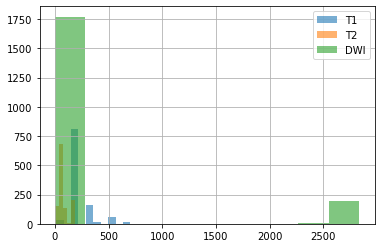

In [21]:
# need some updates...
# the experiments on dicom header information includes find the exact field to filder the correct images, and check the dimentions of corresponding images.
# filter T1 with T1 or MPRAGE in series_description
from matplotlib import pyplot as plt 
select_image = ['patient_id',  'dim1', 'dim2', 'dim3', 'dim4', 'TR', 'TE', 'series_description', 'dcm_dir_name'];
tmp_dcm_df = ppmi_dicom_data[select_image].dropna()
tmp_dcm_df[tmp_dcm_df['series_description'].str.contains('T1|MPRAGE', regex=True)].dim3.hist(alpha=0.6, label='T1')
# filter T2 with T2 in series_description
tmp_dcm_df[tmp_dcm_df['series_description'].str.contains('T2')].dim3.hist(bins=10, alpha=0.6, label='T2')
# filter DTI with T1 in series_description
tmp_dcm_df[tmp_dcm_df['series_description'].str.contains('DTI')].dim3.hist(bins=10, alpha=0.6, label='DWI')
#plt.xlim([100,500])
plt.legend()

In [22]:
# reorganize PPMI Imaging data for easier query
tmp=ppmi_img_dl_data.groupby('Subject').agg(lambda x: list(x))
# get subject related features.
tmp['group'] = tmp['Group'].apply(lambda x: list(set(x))[0])
tmp['sex']   = tmp['Sex'].apply(lambda x: list(set(x))[0])
tmp['visit']  = tmp['Visit'].apply(lambda x: list(set(x)))
tmp['image_modality']  = tmp['Modality'].apply(lambda x: list(set(x)))
tmp['image_details'] =  tmp['Visit'].apply(lambda x: [str(y) for y in list(set(x))])
# get 
for x in tmp.index:
    tmp_str = ''
    for y in range(len(tmp.loc[x,'Visit'])):
        if y==0:
            tmp_str=str(tmp.loc[x,'Visit'][y])+'@'+str(tmp.loc[x,'Age'][y])+'@'+str(tmp.loc[x,'Modality'][y])+'@'+str(tmp.loc[x,'Image Data ID'][y])+'@'+str(tmp.loc[x,'Description'][y]);
        else:
            tmp_str=tmp_str+'+++'+str(tmp.loc[x,'Visit'][y])+'@'+str(tmp.loc[x,'Age'][y])+'@'+str(tmp.loc[x,'Modality'][y])+'@'+str(tmp.loc[x,'Image Data ID'][y])+'@'+str(tmp.loc[x,'Description'][y]);
    tmp.loc[x,'image_details']=tmp_str
ppmi_img_dl_data=tmp.drop(columns=['Image Data ID','Visit','Sex','Age','Group','Modality','Description'])

# subjects with MRI&DTI
tmp_imaging = ppmi_img_dl_data.copy()
tmp_imaging['filter_modality'] = tmp_imaging['image_modality'].apply(lambda x: x if len(x)>1 else np.nan).copy()
tmp_imaging=tmp_imaging.dropna()
tmp_imaging['img_visit']=tmp_imaging['visit']
tmp_imaging=tmp_imaging.drop(columns=['image_modality','image_details','filter_modality','visit'])

In [23]:
## preproc of tabular data
clinical_visit = ['BL', 'V04', 'V06', 'V08', 'V10', 'V12', 'V14', 'V15', 'V17', 'SC',
                  'V01', 'V02', 'V03', 'V05', 'V07', 'V09', 'V11', 'ST', 'V13',
                  'V16', 'PW', 'RS1', 'R17', 'R16', 'R15', 'V18', 'U01', 'R18',
                  'R14', 'R13', 'R08', 'R12', 'R06', 'R10', 'R04', 'R01'];
# visit: V01: 1,2,3    remote visit: R17:-17  Unscheduled visit: U01, -100
# screening:SC: -110 , RS1: rescreening, -111; RS2 rescreening, -112
# ST:Symptomatic Therapy -1000, 
# PW: Premature Withdrawal = -10000
unified_visit = [0, 4, 6, 8, 10, 12, 14, 15, 17, -110,
                 1, 2, 3, 5, 7, 9, 1, -1000, 13,
                 16, -10000, -111, -17, -16, -15, 18, -100, -18,
                 -14, -13, -8, -12, -6, -10, -4, -1];
visit_dict = dict(zip(clinical_visit, unified_visit))

# subjects with UPDRS
tmp_updrs3=ppmi_updrs3_data[['PATNO','EVENT_ID']].copy()
tmp_updrs3['Visit']=tmp_updrs3.EVENT_ID.apply(lambda x: visit_dict[x]);
tmp_updrs3=tmp_updrs3[tmp_updrs3['Visit']>0].copy(); tmp_updrs3['Subject']=tmp_updrs3['PATNO'];
tmp_updrs3 = tmp_updrs3.groupby('Subject').agg(lambda x: list(x)).copy()
tmp_updrs3['updrs3_visit']=tmp_updrs3['Visit'].apply(lambda x: list(set(x)))
tmp_updrs3=tmp_updrs3.drop(columns=['PATNO', 'EVENT_ID', 'Visit']).copy()
tmp_updrs3.index=[str(x) for x in tmp_updrs3.index]
# subjects with MOCA
tmp_moca = ppmi_moca_data
tmp_moca=ppmi_moca_data[['PATNO','EVENT_ID']].copy()
tmp_moca['Visit']=tmp_moca.EVENT_ID.apply(lambda x: visit_dict[x]);
tmp_moca=tmp_moca[tmp_moca['Visit']>0].copy(); tmp_moca['Subject']=tmp_moca['PATNO'];
tmp_moca = tmp_moca.groupby('Subject').agg(lambda x: list(x)).copy()
tmp_moca['moca_visit']=tmp_moca['Visit'].apply(lambda x: list(set(x)))
tmp_moca=tmp_moca.drop(columns=['PATNO', 'EVENT_ID', 'Visit']).copy()
tmp_moca.index=[str(x) for x in tmp_moca.index]

,group,sex,img_visit,updrs3_visit,moca_visit,img_cnt,updrs3_cnt,moca_cnt
Subject,,,,,,,,
14426,Prodromal,M,"[1, 7]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[8, 10, 4, 6]",2,10,4
16644,Prodromal,M,"[1, 5, 7]","[1, 2, 3, 4, 6, 7, 8, 13]","[8, 4, 6]",3,8,3
3101,SWEDD,M,"[1, 7]","[1, 2, 3, 4, 5, 6]","[4, 6]",2,6,2
3102,PD,M,"[1, 21, 7]","[1, 2, 3, 5, 6, 7, 8, 9, 10]","[8, 10, 6]",3,9,3
3104,Control,M,"[1, 5]","[4, 6]","[4, 6]",2,2,2
...,...,...,...,...,...,...,...,...
72138,Prodromal,F,"[1, 7]","[2, 4, 5, 6]","[4, 6]",2,4,2
75422,Prodromal,M,"[1, 7]","[8, 2, 4, 6]","[8, 4, 6]",2,4,3
75480,PD,M,"[1, 7]","[2, 4, 5, 6, 8]","[8, 4, 6]",2,5,3


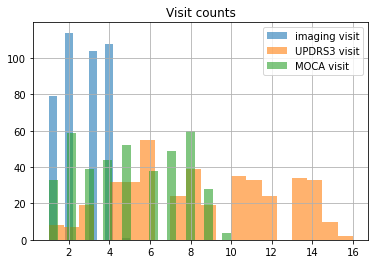

In [24]:
tmp_all=tmp_imaging.join([tmp_updrs3, tmp_moca], how='left');
tmp_all=tmp_all.dropna()
#print(tmp_all.img_visit)
#print(tmp_all.updrs3_visit)
#print(tmp_all.moca_visit)
tmp_all['img_cnt']=[len(x) for x in tmp_all['img_visit']]
tmp_all['updrs3_cnt']=[len(x) for x in tmp_all['updrs3_visit']]
tmp_all['moca_cnt']=[len(x) for x in tmp_all['moca_visit']]
display(tmp_all[tmp_all['img_cnt']>1])
tmp_all.img_cnt.hist(bins=10, alpha=0.6, label='imaging visit')
tmp_all.updrs3_cnt.hist(bins=20, alpha=0.6, label='UPDRS3 visit')
tmp_all.moca_cnt.hist(bins=20, alpha=0.6, label='MOCA visit')
plt.title("Visit counts")
plt.legend()

In [25]:
tmp_all[tmp_all['img_cnt']>1]

,group,sex,img_visit,updrs3_visit,moca_visit,img_cnt,updrs3_cnt,moca_cnt
Subject,,,,,,,,
14426,Prodromal,M,"[1, 7]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[8, 10, 4, 6]",2,10,4
16644,Prodromal,M,"[1, 5, 7]","[1, 2, 3, 4, 6, 7, 8, 13]","[8, 4, 6]",3,8,3
3101,SWEDD,M,"[1, 7]","[1, 2, 3, 4, 5, 6]","[4, 6]",2,6,2
3102,PD,M,"[1, 21, 7]","[1, 2, 3, 5, 6, 7, 8, 9, 10]","[8, 10, 6]",3,9,3
3104,Control,M,"[1, 5]","[4, 6]","[4, 6]",2,2,2
...,...,...,...,...,...,...,...,...
72138,Prodromal,F,"[1, 7]","[2, 4, 5, 6]","[4, 6]",2,4,2
75422,Prodromal,M,"[1, 7]","[8, 2, 4, 6]","[8, 4, 6]",2,4,3
75480,PD,M,"[1, 7]","[2, 4, 5, 6, 8]","[8, 4, 6]",2,5,3


In [26]:
tmp_all_test=tmp_all.copy()
for x in tmp_all_test.index:
    tmp_=list(set.intersection(set(tmp_all_test.loc[x,'img_visit']),set(tmp_all_test.loc[x, 'updrs3_visit']),set(tmp_all_test.loc[x, 'moca_visit'])))
    if len(tmp_)==0:
        tmp_all_test.loc[x, 'visit_comm'] = np.nan;
    else:
        tmp_all_test.loc[x, 'visit_comm'] = [str(x) for x in tmp_]
tmp_all_test=tmp_all_test.dropna()
tmp_all_test

,group,sex,img_visit,updrs3_visit,moca_visit,img_cnt,updrs3_cnt,moca_cnt,visit_comm
Subject,,,,,,,,,
85242,Prodromal,M,"[1, 5, 7]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14]","[1, 4, 6, 8, 10, 12, 13, 14]",3,13,8,1


In [31]:
# Read tabular information
ppmi_img_dl_data  = pd.read_csv(ppmi_img_dl_file, sep=',')
ppmi_img_col_sel = ['Image Data ID', 'Subject', 'Group', 'Sex', 'Age', 'Visit', 'Modality', 'Description']
# select imaging columns
ppmi_img_dl_data = ppmi_img_dl_data.loc[:, ppmi_img_col_sel].copy()
# select study groups
group_sel_list=['PD', 'Prodromal', 'SWEDD', 'Control']
ppmi_img_dl_data = ppmi_img_dl_data[ppmi_img_dl_data.Group.isin(group_sel_list)].copy()
ppmi_img_dl_data[ppmi_img_dl_data['Visit']==0]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description
2537,I362497,3837,PD,M,64,0,MRI,Axial PD-T2 TSE
2538,I362499,3837,PD,M,64,0,DTI,DTI_gated
2539,I362496,3837,PD,M,64,0,DTI,DTI_gated
2540,I362498,3837,PD,M,64,0,MRI,MPRAGE GRAPPA
2588,I362495,3833,PD,F,73,0,MRI,MPRAGE GRAPPA
2589,I362491,3833,PD,F,73,0,DTI,DTI_gated
2590,I362493,3833,PD,F,73,0,MRI,Axial PD-T2 TSE
2591,I362492,3833,PD,F,73,0,DTI,DTI_gated
2959,I344287,3801,SWEDD,M,43,0,MRI,MPRAGE GRAPPA
2960,I344289,3801,SWEDD,M,43,0,DTI,DTI_gated
